<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Insurance_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='children', ylabel='charges'>

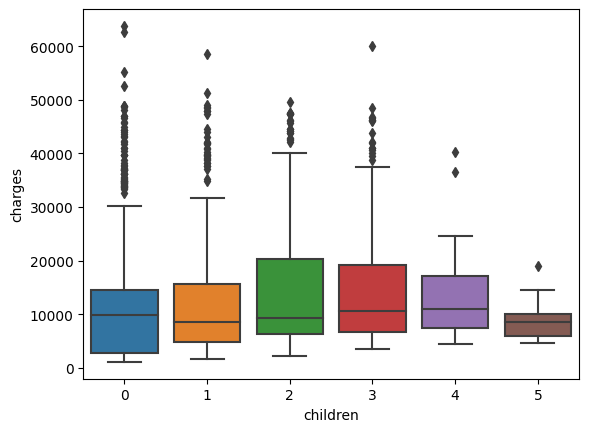

In [ ]:
sns.boxplot(x = "children",
            y = "charges",
            data = df)

<Axes: xlabel='smoker', ylabel='charges'>

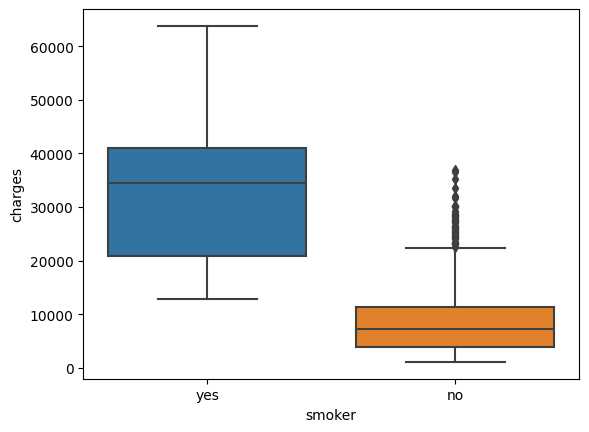

In [ ]:
sns.boxplot(x="smoker",
            y="charges",
            data = df)

<Axes: xlabel='charges'>

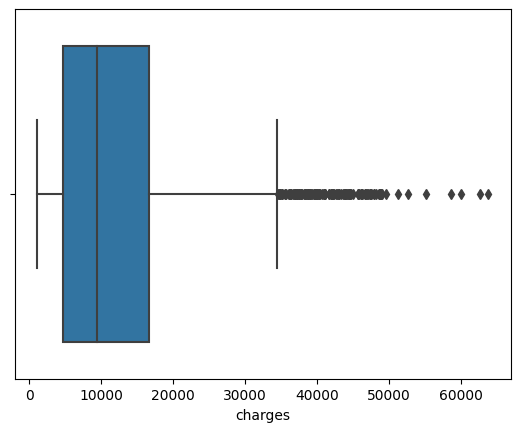

In [ ]:
sns.boxplot(x = "charges", data=df)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = df[["age", "bmi", "children", "smoker", "charges"]]
df = df[(df["charges"] >= 1200) & (df["charges"] <= 30000)]
df.shape

(1166, 5)

In [ ]:
def converter(opsi):
    if opsi == "yes":
        return 1
    return 0

df["smoking"] = df["smoker"].apply(converter)

In [ ]:
df.head()

,age,bmi,children,smoker,charges,smoking
0,19,27.900,0,yes,16884.92400,1
1,18,33.770,1,no,1725.55230,0
2,28,33.000,3,no,4449.46200,0
3,33,22.705,0,no,21984.47061,0
4,32,28.880,0,no,3866.85520,0


In [ ]:
# Drop column smoker
df.drop(columns=["smoker"], inplace=True)

In [ ]:
df.head()

,age,bmi,children,charges,smoking
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [ ]:
y = df["charges"].values
X = df[["age", "bmi", "children", "smoking"]].values
X

array([[19.  , 27.9 ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  ,  0.  ],
       [61.  , 29.07,  0.  ,  1.  ]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVM = SVR()

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred

In [ ]:
list_model = [LR, DT, RF, SVM]
list_nama = ["Linear Regression",
             "Decision Tree",
             "Random Forest",
             "SVM"]

In [ ]:
list_pred = []

for model in list_model:
    prediksi = train_model(model, X_train, X_test, y_train, y_test)
    list_pred.append(prediksi)

In [ ]:
list_pred

[array([ 7062.30318721, 11465.71500614,  4348.04372213, 10598.44105509,
        13778.94154517,  6065.64172266,  3928.73795705,  8117.1607349 ,
         9875.53300089, 12546.34540021,  3615.76921451, 24201.87803577,
        12180.02418749, 10801.01629476,  4826.61825391,  5343.61924341,
         8649.41132508, 16338.85767619,  9521.42207506,  6406.44978846,
         5681.21381607,  7230.01871611,  6482.48308995,  5330.55304714,
         8061.30408783, 21786.62368664, 10786.08854046, 13518.50425453,
         4545.67690654,  9320.19736615, 15200.23200761,  6278.79398326,
        15233.01187194,  4439.83590973, 11771.94295019,  6334.23804538,
        13379.89339705,  3171.21663185,  6953.50491307,  3935.0221714 ,
         5002.55147812, 24858.13075976,  3799.9846907 , 11571.71063025,
         3534.09920554,  5794.68781616,  2895.35033566,  9981.73702752,
         9379.99041982, 10472.99169002, 15478.45437336,  3949.06923877,
        10334.01291471,  7335.36509153,  3713.97720804, 11948.25

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
# MSE
for i,prediksi in enumerate(list_pred):
    print(list_nama[i], round(mean_squared_error(y_test, prediksi), 2))

Linear Regression 11965688.85
Decision Tree 33860216.7
Random Forest 17933883.44
SVM 42366539.14


In [ ]:
# MAE
for i,prediksi in enumerate(list_pred):
    print(list_nama[i], round(mean_absolute_error(y_test, prediksi), 2))

Linear Regression 2034.66
Decision Tree 2660.86
Random Forest 2343.03
SVM 4937.28


In [ ]:
# MAPE
for i,prediksi in enumerate(list_pred):
    print(list_nama[i], round(mean_absolute_percentage_error(y_test, prediksi), 2))

Linear Regression 0.31
Decision Tree 0.42
Random Forest 0.4
SVM 0.92


In [ ]:
# RMSE
for i,prediksi in enumerate(list_pred):
    print(list_nama[i], round(mean_squared_error(y_test, prediksi)**0.5, 2))

Linear Regression 3459.15
Decision Tree 5818.95
Random Forest 4234.84
SVM 6508.96
